# nfl_qbs
#### Developed by Sam Isenberg, last updated 09/2018

This code utilizes the dataset of college quarterback statistics and physical attributes (see *./r/cfb_stats*) in an attempt to predict the professional success of notable recently-drafted quarterbacks using random forests. The code first iterates through the algorithm twice - each time using a different randomly-split training & test set - and then repeats the process ten thousand times. Finally, results for each recently-drafted quarterback are aggregated and analyzed.

A full description of the project can be found at [**saisenberg.com**](https://saisenberg.com/projects/quarterbacks.html).
### Contents:
1. Setup & preprocessing
2. First two model iterations
3. Ten thousand model iterations
4. Analysis of results

### <a name='setup'/> 1. Setup & preprocessing

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import pandas as pd
import seaborn as sns
import warnings

from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split

In [2]:
# Read csv files
prev_drafted_qb = pd.read_csv('./data/prev_drafted_qb.csv')
recent_drafted_qb = pd.read_csv('./data/recent_drafted_qb.csv')

# Subset recent_drafted_qb dataframe to notable ("relevant") recently-drafted qbs
relevant_qbs_list = [
    'Baker Mayfield',
    'C.J. Beathard',
    'Cooper Rush',
    'Davis Webb',
    'Deshaun Watson',
    'DeShone Kizer',
    'Josh Allen',
    'Josh Rosen',
    'Kyle Lauletta',
    'Lamar Jackson',
    'Mason Rudolph',
    'Mitch Trubisky',
    'Nathan Peterman',
    'Patrick Mahomes',
    'Sam Darnold'
]

recent_drafted_qb = recent_drafted_qb[recent_drafted_qb['player'].isin(relevant_qbs_list)]

In [3]:
# Add new columns
def newCols(df):
        
    # ATT per G
    df['att_per_g'] = df.apply(lambda x: x['att'] / x['g'], axis = 1)
    
    # PASS to RUSH ratio
    df['pass_rush_ratio'] = df.apply(lambda x: x['att'] / x['rush_att'], axis = 1)
    
newCols(prev_drafted_qb)
newCols(recent_drafted_qb)

In [4]:
# Set predictor variables
predictors = ['yrs_in_school', 'att_per_g', 'rate', 'pass_rush_ratio', 'height']

Y = prev_drafted_qb.loc[:, 'success']
X = prev_drafted_qb.loc[:, predictors]
X_recent = recent_drafted_qb.loc[:, predictors]

# Train-test splits (random states 1 & 2)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.10, random_state=2211, stratify=Y)
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X, Y, test_size=0.10, random_state=25, stratify=Y)

# Over-sample from the successful QB group (1 & 2)
from imblearn.over_sampling import SMOTE
X_train, Y_train = SMOTE(random_state=1, ratio=1, k_neighbors=10).fit_sample(X_train, Y_train)
X_train2, Y_train2 = SMOTE(random_state=1, ratio=1, k_neighbors=10).fit_sample(X_train2, Y_train2)

C:\Users\Sam\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Sam\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


### <a name='two'/>2. First two model iterations

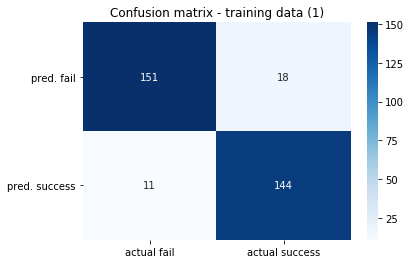

Accuracy: 0.91049382716


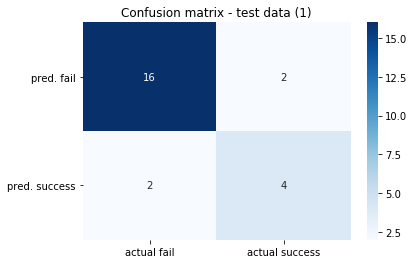

Accuracy: 0.833333333333


In [5]:
# Fit random forest models (1 & 2)
rf = RandomForestClassifier(n_estimators=1001, oob_score=True, max_depth=5, random_state=1)
rf.fit(X_train, Y_train)

rf2 = RandomForestClassifier(n_estimators=1001, oob_score=True, max_depth=5, random_state=1)
rf2.fit(X_train2, Y_train2)

# Confusion matrix for predictions on oversampled training data (1)
predictions_train = rf.predict(X_train)
cm_train = pd.DataFrame(confusion_matrix(predictions_train, Y_train))
heatmap_train = sns.heatmap(cm_train, annot = True, fmt = 'g', cmap='Blues',
            xticklabels=['actual fail', 'actual success'], 
            yticklabels=['pred. fail', 'pred. success'])
heatmap_train.set_yticklabels(rotation=0, labels = heatmap_train.get_yticklabels())
heatmap_train.set_title('Confusion matrix - training data (1)')
plt.show()
print('Accuracy:', accuracy_score(predictions_train, Y_train))

# Confusion matrix for predictions on test data (1)
predictions_test = rf.predict(X_test)
cm_test = pd.DataFrame(confusion_matrix(predictions_test, Y_test))
heatmap_test = sns.heatmap(cm_test, annot = True, fmt = 'g', cmap='Blues', 
            xticklabels=['actual fail', 'actual success'], 
            yticklabels=['pred. fail', 'pred. success'])
heatmap_test.set_yticklabels(rotation=0, labels = heatmap_test.get_yticklabels())
heatmap_test.set_title('Confusion matrix - test data (1)')
plt.show()

print('Accuracy:', accuracy_score(predictions_test, Y_test))

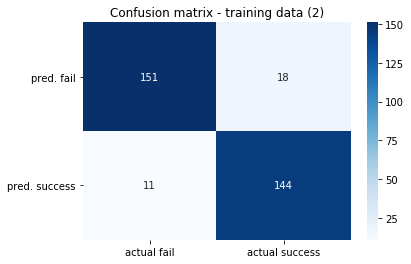

Accuracy: 0.901234567901


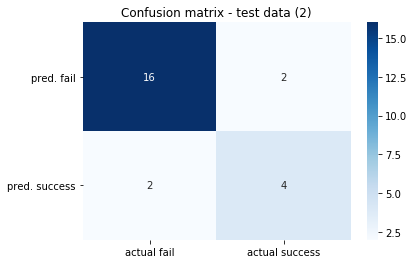

Accuracy: 0.666666666667


In [6]:
# Confusion matrix for predictions on oversampled training data (2)
predictions_train2 = rf2.predict(X_train2)
cm_train2 = pd.DataFrame(confusion_matrix(predictions_train2, Y_train2))
heatmap_train2 = sns.heatmap(cm_train, annot = True, fmt = 'g', cmap='Blues',
            xticklabels=['actual fail', 'actual success'], 
            yticklabels=['pred. fail', 'pred. success'])
heatmap_train2.set_yticklabels(rotation=0, labels = heatmap_train.get_yticklabels())
heatmap_train2.set_title('Confusion matrix - training data (2)')
plt.show()

print('Accuracy:', accuracy_score(predictions_train2, Y_train2))

# Confusion matrix for predictions on test data (2)
predictions_test2 = rf2.predict(X_test2)
cm_test2 = pd.DataFrame(confusion_matrix(predictions_test2, Y_test2))
heatmap_test2 = sns.heatmap(cm_test, annot = True, fmt = 'g', cmap='Blues', 
            xticklabels=['actual fail', 'actual success'], 
            yticklabels=['pred. fail', 'pred. success'])
heatmap_test2.set_yticklabels(rotation=0, labels = heatmap_test.get_yticklabels())
heatmap_test2.set_title('Confusion matrix - test data (2)')
plt.show()

print('Accuracy:', accuracy_score(predictions_test2, Y_test2))

In [7]:
# Examine test results (train/test split #1)
predictions_test_cont = rf.predict_proba(X_test)[:,1]*100
pred_test_df = pd.DataFrame({'pred':predictions_test, 'actual':Y_test}).set_index(X_test.index).sort_index()
pred_test_df = pd.merge(pred_test_df, pd.DataFrame(prev_drafted_qb['player']), left_index=True, right_index=True).set_index('player')
pred_test_df['correct'] = pred_test_df['actual'] + pred_test_df['pred'] != 1
pred_test_df

,actual,pred,correct
player,,,
Austin Davis,0,0,True
Bryce Petty,0,0,True
Carson Wentz,1,1,True
Chris Simms,0,0,True
Connor Shaw,0,0,True
Dak Prescott,1,1,True
Daunte Culpepper,1,1,True
Derek Anderson,0,0,True
Drew Bledsoe,1,0,False


In [8]:
# Examine predictions for notable recently-drafted quarterbacks (train/test split #1)
predictions_recent = rf.predict(X_recent)
predictions_recent_cont = rf.predict_proba(X_recent)[:,1]*100
pd.DataFrame({'pred':predictions_recent, 'conf':predictions_recent_cont}).set_index(recent_drafted_qb['player'])

,conf,pred
player,,
Baker Mayfield,19.481400,0
C.J. Beathard,19.227263,0
Cooper Rush,51.267635,1
Davis Webb,40.598479,0
Deshaun Watson,75.707724,1
DeShone Kizer,58.778222,1
Josh Allen,47.797375,0
Josh Rosen,60.327320,1
Kyle Lauletta,37.701333,0


In [9]:
# Random forest feature importances (train/test split #1)
pd.DataFrame({'feature':pd.Series(predictors), 'importance':pd.Series(rf.feature_importances_)}).set_index('feature').sort_values('importance', ascending=False)

,importance
feature,
height,0.256197
rate,0.236461
att_per_g,0.197002
yrs_in_school,0.164412
pass_rush_ratio,0.145927


### <a name='10K'/>3. Ten thousand model iterations

Note: The following code is not particularly labor-intensive, but it is time-consuming; if time is an issue, I suggest decreasing *num_splits* or [contacting me](mailto:isenbergsamuel@gmail.com) for a _[pickle](https://docs.python.org/2/library/pickle.html)_ item of the resulting dictionary.

In [10]:
# Repeatedly test and save predictions for recently drafted QBs

# Ignore warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Set up lists of values for each quarterback
all_recent_predictions = [[] for i in range(len(recent_drafted_qb['player']))]

starting_seed = 100
num_splits = 10000
count = 1

# Repeat this process for different training/test splits
for i in range(starting_seed, starting_seed+num_splits):
    
    count = count+1
    if count % 25 == 1:
        print('', str(count-1), '/', num_splits)
    
    # Split into training-test
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.10, random_state=i, stratify=Y)
    
    # Oversample from minority class
    X_train, Y_train = SMOTE(random_state=1, ratio=1, k_neighbors=10).fit_sample(X_train, Y_train)
    
    # Fit random forest
    rf = RandomForestClassifier(n_estimators=1001, oob_score=True, max_depth=5, random_state=1)
    rf.fit(X_train, Y_train)
    
    # Predict on recent quarterbacks
    recent_predictions = rf.predict_proba(X_recent)[:,1]
    
    # Add result to list
    for i in range(0, len(list(recent_predictions))):
        all_recent_predictions[i].append(recent_predictions[i])

In [11]:
# Create dictionary with each player's 10K results
master_recent = {}

for i in range(len(relevant_qbs_list)):
    master_recent[relevant_qbs_list[i]] = all_recent_predictions[i]

### <a name='analysis'/> 4. Analysis of results

In [12]:
# Collect and display the means and standard deviations of each quarterback's predictions
means = []
stdevs = []

for i in master_recent:
    means.append(100 * round(np.mean(master_recent[i]),3))
    stdevs.append(100 * round(np.std(master_recent[i]),3))
    
recent_results = pd.DataFrame({'player':relevant_qbs_list, 'mean (%)':means, 'sd (%)':stdevs})[['player', 'mean (%)', 'sd (%)']]
recent_results.sort_values('mean (%)', ascending=False)

,player,mean (%),sd (%)
4,Deshaun Watson,75.0,5.8
14,Sam Darnold,66.3,6.9
10,Mason Rudolph,66.0,6.3
7,Josh Rosen,63.9,7.1
5,DeShone Kizer,62.3,4.8
13,Patrick Mahomes,61.2,6.9
9,Lamar Jackson,56.8,5.6
6,Josh Allen,52.1,6.9
11,Mitch Trubisky,48.9,8.2
2,Cooper Rush,43.1,7.6


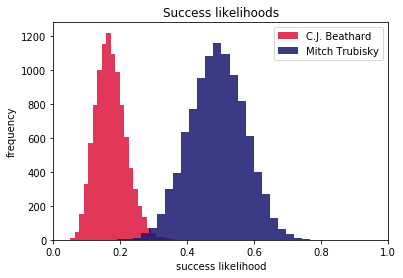

In [13]:
# Plot Beathard and Trubisky distributions on same plot
plt.hist(master_recent['C.J. Beathard'], bins=25, color='crimson', alpha=0.85, label='C.J. Beathard')
plt.hist(master_recent['Mitch Trubisky'], bins=25, color='midnightblue', alpha=0.85, label='Mitch Trubisky')
plt.xlim(0, 1)
plt.xlabel('success likelihood')
plt.ylabel('frequency')
plt.title('Success likelihoods')
plt.legend(loc='upper right')
plt.show()

In [14]:
# For each quaterback, determine number of results falling within each 5% bin
intervals_dict = dict.fromkeys(relevant_qbs_list)
intervals = np.arange(0, 100.01, 5)

for player_name in list(intervals_dict.keys()):
    
    player_list = []
    
    for num, i in enumerate(intervals[0:len(intervals)-1]):

        start = (intervals[num])/100
        end = (intervals[num+1])/100
        
        num_results = len([x for x in master_recent[player_name] if (x >= start) & (x<end)]) / len(master_recent[player_name])

        player_list.append(num_results)
    
    intervals_dict[player_name] = player_list
    
intervals_df = pd.DataFrame.from_dict(intervals_dict).transpose()


# Rename all columns
cols_list = []

for num, i in enumerate(intervals[0:len(intervals)-1]):
    first_num = int(intervals[num])
    second_num = int(intervals[num+1])
    
    col = str(first_num) + '-' + str(second_num) + '%'
    cols_list.append(col)
    
intervals_df.columns = cols_list

# Merge with recent_results df, sort by mean success likelihood
intervals_df = pd.merge(recent_results[['player', 'mean (%)']], intervals_df, left_on='player', right_index=True)
intervals_df = intervals_df.set_index('player')
intervals_df = intervals_df.sort_values('mean (%)', ascending=False)

In [15]:
# Display binned results
pd.set_option('display.max_columns', None)
intervals_df

,mean (%),0-5%,5-10%,10-15%,15-20%,20-25%,25-30%,30-35%,35-40%,40-45%,45-50%,50-55%,55-60%,60-65%,65-70%,70-75%,75-80%,80-85%,85-90%,90-95%,95-100%
player,,,,,,,,,,,,,,,,,,,,,
Deshaun Watson,75.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0003,0.0024,0.0087,0.0455,0.1278,0.2785,0.3372,0.1780,0.0214,0.0002,0.0
Sam Darnold,66.3,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0010,0.0034,0.0132,0.0453,0.1147,0.2204,0.2828,0.2315,0.0791,0.0083,0.0003,0.0000,0.0
Mason Rudolph,66.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0001,0.0009,0.0078,0.0377,0.1239,0.2411,0.3151,0.2062,0.0601,0.0069,0.0002,0.0000,0.0
Josh Rosen,63.9,0.0,0.0000,0.0000,0.0000,0.0000,0.0001,0.0003,0.0014,0.0080,0.0245,0.0740,0.1629,0.2645,0.2690,0.1521,0.0399,0.0033,0.0000,0.0000,0.0
DeShone Kizer,62.3,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0008,0.0075,0.0609,0.2343,0.4141,0.2340,0.0449,0.0035,0.0000,0.0000,0.0000,0.0
Patrick Mahomes,61.2,0.0,0.0000,0.0000,0.0000,0.0001,0.0000,0.0003,0.0030,0.0135,0.0469,0.1193,0.2220,0.2874,0.2151,0.0803,0.0116,0.0005,0.0000,0.0000,0.0
Lamar Jackson,56.8,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0002,0.0012,0.0132,0.0843,0.2764,0.3724,0.1758,0.0548,0.0199,0.0018,0.0000,0.0000,0.0000,0.0
Josh Allen,52.1,0.0,0.0000,0.0000,0.0000,0.0000,0.0009,0.0060,0.0356,0.1112,0.2216,0.2859,0.2118,0.1002,0.0235,0.0032,0.0001,0.0000,0.0000,0.0000,0.0
Mitch Trubisky,48.9,0.0,0.0000,0.0000,0.0003,0.0011,0.0078,0.0372,0.0968,0.1771,0.2289,0.2177,0.1461,0.0651,0.0185,0.0032,0.0002,0.0000,0.0000,0.0000,0.0


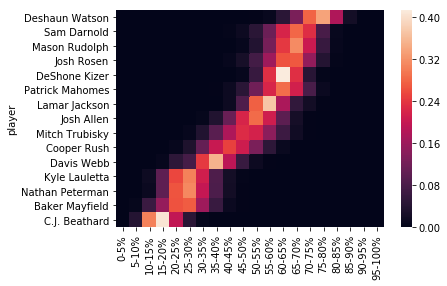

In [16]:
# Heatmap of binned results
sns.heatmap(intervals_df.drop(['mean (%)'], axis=1))